In [2]:
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
bxl_5 = pd.read_csv("/belgium-obu/Bxl_5_2021.csv")
bxl_5.columns = ['datetime','street_id','count','vel']
and_5 = pd.read_csv("/belgium-obu/Anderlecht_5_2021.csv")
and_5.columns = ['datetime','street_id','count','vel']
bel_5 = pd.read_csv("/belgium-obu/Bel_5_2021.csv")
bel_5.columns = ['datetime','street_id','count','vel']
bxl_15 = pd.read_csv("/belgium-obu/Bxl_15_2021.csv")
bxl_15.columns = ['datetime','street_id','count','vel']
and_15 = pd.read_csv("/belgium-obu/Anderlecht_15_2021.csv")
and_15.columns = ['datetime','street_id','count','vel']
bel_15 = pd.read_csv("/belgium-obu/Bel_15_2021.csv")
bel_15.columns = ['datetime','street_id','count','vel']
bxl_30 = pd.read_csv("/belgium-obu/Bxl_30_2021.csv")
bxl_30.columns = ['datetime','street_id','count','vel']
and_30 = pd.read_csv("/belgium-obu/Anderlecht_30_2021.csv")
and_30.columns = ['datetime','street_id','count','vel']
bel_30 = pd.read_csv("/belgium-obu/Bel_30_2021.csv")
bel_30.columns = ['datetime','street_id','count','vel']

In [4]:
bxl_5.groupby(['street_id']).count()

,datetime,count,vel
street_id,,,
0.000000,111,112,112
0.100000,0,1,1
0.125000,0,1,1
0.166667,0,1,1
0.200000,0,1,1
...,...,...,...
4535.000000,22,22,22
4536.000000,323,323,323
4537.000000,458,458,458


In [5]:
print('bxl_5 dupplicate rows :', bxl_5.duplicated().sum())

bxl_5 dupplicate rows : 139


In [6]:
bxl_5.isnull().sum()

datetime     24317
street_id        0
count            0
vel              0
dtype: int64

In [7]:
bxl_5.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 23:40:00,43942.000000,18,703.000000
2021-06-05 23:45:00,12410.000000,9,214.000000
2021-06-05 23:50:00,4341.000000,2,64.000000
2021-06-05 23:55:00,14484.000000,9,327.000000
NaN,930877.333411,0,267157.367476


In [8]:
bxl_5.dropna(inplace=True)
bxl_5.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [9]:
print(bxl_15.isnull().sum())

print('-------bxl_15 null values in percentage--------')
print(bxl_15.isnull().sum() * 100 / len(bxl_15))

datetime     18227
street_id        0
count            0
vel              0
dtype: int64
-------bxl_15 null values in percentage--------
datetime     1.045359
street_id    0.000000
count        0.000000
vel          0.000000
dtype: float64


In [10]:
bxl_15.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 23:00:00,62549.00000,26,911.000000
2021-06-05 23:15:00,35536.00000,13,351.000000
2021-06-05 23:30:00,82979.00000,32,1119.000000
2021-06-05 23:45:00,31235.00000,20,605.000000
NaN,742637.24368,0,216123.178839


In [11]:
bxl_15.dropna(inplace=True)
bxl_15.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [12]:
print(bxl_30.isnull().sum())

print('-------bxl_30 null values in percentage--------')
print(bxl_30.isnull().sum() * 100 / len(bxl_30))

datetime     0
street_id    0
count        0
vel          0
dtype: int64
-------bxl_30 null values in percentage--------
datetime     0.0
street_id    0.0
count        0.0
vel          0.0
dtype: float64


In [13]:
print(and_5.isnull().sum())

print('-------and_5 null values in percentage--------')
print(and_5.isnull().sum() * 100 / len(and_5))

datetime     0
street_id    0
count        0
vel          0
dtype: int64
-------and_5 null values in percentage--------
datetime     0.0
street_id    0.0
count        0.0
vel          0.0
dtype: float64


In [14]:
print(and_15.isnull().sum())

print('-------and_15 null values in percentage--------')
print(and_15.isnull().sum() * 100 / len(and_15))

datetime     2291
street_id       0
count           0
vel             0
dtype: int64
-------and_15 null values in percentage--------
datetime     0.449971
street_id    0.000000
count        0.000000
vel          0.000000
dtype: float64


In [15]:
and_15.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 22:45:00,8984.000000,6,437.000000
2021-06-05 23:00:00,28699.000000,15,695.000000
2021-06-05 23:15:00,1957.000000,1,0.000000
2021-06-05 23:30:00,7701.000000,7,518.000000
NaN,129416.501111,0,10882.164106


In [16]:
and_15.dropna(inplace=True)
and_15.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [17]:
print(and_30.isnull().sum())

print('-------and_30 null values in percentage--------')
print(and_30.isnull().sum() * 100 / len(and_30))

datetime     5209
street_id       0
count           0
vel             0
dtype: int64
-------and_30 null values in percentage--------
datetime     1.204647
street_id    0.000000
count        0.000000
vel          0.000000
dtype: float64


In [18]:
and_30.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 22:00:00,6253.000000,6,440.000000
2021-06-05 22:30:00,12536.000000,10,677.500000
2021-06-05 23:00:00,30656.000000,16,695.000000
2021-06-05 23:30:00,7701.000000,7,518.000000
NaN,272944.496004,0,37649.258963


In [19]:
and_30.dropna(inplace=True)
and_30.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [20]:
print(bel_5.isnull().sum())

print('-------bel_5 null values in percentage--------')
print(bel_5.isnull().sum() * 100 / len(bel_5))

datetime     569479
street_id         0
count             0
vel               0
dtype: int64
-------bel_5 null values in percentage--------
datetime     2.112654
street_id    0.000000
count        0.000000
vel          0.000000
dtype: float64


In [21]:
bel_5.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 23:40:00,4.786600e+05,211,1.440222e+04
2021-06-05 23:45:00,4.755670e+05,196,1.430129e+04
2021-06-05 23:50:00,4.601320e+05,206,1.411503e+04
2021-06-05 23:55:00,4.657990e+05,196,1.411975e+04
NaN,3.989276e+07,0,2.717938e+07


In [22]:
bel_5.dropna(inplace=True)
bel_5.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [23]:
print(bel_15.isnull().sum())

print('-------bel_15 null values in percentage--------')
print(bel_15.isnull().sum() * 100 / len(bel_15))

datetime     390526
street_id         0
count             0
vel               0
dtype: int64
-------bel_15 null values in percentage--------
datetime     2.66449
street_id    0.00000
count        0.00000
vel          0.00000
dtype: float64


In [24]:
bel_15.groupby(['datetime'], dropna= False).sum().tail()

,street_id,count,vel
datetime,,,
2021-06-05 23:00:00,1.197240e+06,641,3.559611e+04
2021-06-05 23:15:00,1.209896e+06,672,3.672040e+04
2021-06-05 23:30:00,1.207178e+06,645,3.664560e+04
2021-06-05 23:45:00,1.098545e+06,563,3.318505e+04
NaN,2.873477e+07,0,2.050454e+07


In [25]:
bel_15.dropna(inplace=True)
bel_15.isnull().sum()

datetime     0
street_id    0
count        0
vel          0
dtype: int64

In [26]:
print(bel_30.isnull().sum())

print('-------bel_30 null values in percentage--------')
print(bel_30.isnull().sum() * 100 / len(bel_30))

datetime     0
street_id    0
count        0
vel          0
dtype: int64
-------bel_30 null values in percentage--------
datetime     0.0
street_id    0.0
count        0.0
vel          0.0
dtype: float64


In [27]:
bxl_5['OBU']= 5
bxl_5.head()

,datetime,street_id,count,vel,OBU
0,2021-05-28 13:50:00,2741.0,1,0.000000,5
1,2021-05-04 11:50:00,415.0,2,26.500000,5
2,2021-05-21 07:30:00,2954.0,7,27.285714,5
3,2021-05-21 09:45:00,1315.0,1,46.000000,5
4,2021-04-18 04:25:00,8.0,1,46.000000,5


In [28]:
bxl_15['OBU']= 15
bxl_30['OBU']= 30


In [29]:
and_5['OBU']= 5
and_15['OBU']= 15
and_30['OBU']= 30
bel_5['OBU']= 5
bel_15['OBU']= 15
bel_30['OBU']= 30


In [30]:
df_bxl = pd.concat([bxl_5, bxl_15, bxl_30], axis=0)
df_bxl.info(null_counts=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5303354 entries, 0 to 1421463
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   datetime   5303354 non-null  object 
 1   street_id  5303354 non-null  float64
 2   count      5303354 non-null  int64  
 3   vel        5303354 non-null  float64
 4   OBU        5303354 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 242.8+ MB


In [31]:
df_and=pd.concat([and_5, and_15, and_30], axis = 0)
df_and.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558237 entries, 0 to 432408
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   datetime   1558237 non-null  object 
 1   street_id  1558237 non-null  float64
 2   count      1558237 non-null  int64  
 3   vel        1558237 non-null  float64
 4   OBU        1558237 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 71.3+ MB


In [32]:
df_bel = pd.concat([bel_5, bel_15, bxl_5], axis=0)
df_bel.info(null_counts= True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42808812 entries, 0 to 2180822
Data columns (total 5 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   datetime   42808812 non-null  object 
 1   street_id  42808812 non-null  float64
 2   count      42808812 non-null  int64  
 3   vel        42808812 non-null  float64
 4   OBU        42808812 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ GB


In [33]:
df_bxl['datetime'] = pd.to_datetime(df_bxl['datetime'])
bxl_5['datetime'] = pd.to_datetime(bxl_5['datetime'])

In [34]:
df_bxl = df_bxl.set_index('datetime')
bxl_5 = bxl_5.set_index('datetime')
df_bxl.head()

,street_id,count,vel,OBU
datetime,,,,
2021-05-28 13:50:00,2741.0,1,0.000000,5
2021-05-04 11:50:00,415.0,2,26.500000,5
2021-05-21 07:30:00,2954.0,7,27.285714,5
2021-05-21 09:45:00,1315.0,1,46.000000,5
2021-04-18 04:25:00,8.0,1,46.000000,5


In [35]:
df_bxl = df_bxl.sort_index()
bxl_5 = bxl_5.sort_index()

df_bxl

,street_id,count,vel,OBU
datetime,,,,
2021-03-13 11:30:00,4463.0,1,34.0,30
2021-03-13 11:30:00,3630.0,1,29.0,30
2021-03-13 11:30:00,3630.0,1,29.0,15
2021-03-13 11:30:00,2989.0,1,45.0,15
2021-03-13 11:30:00,183.0,1,0.0,30
...,...,...,...,...
2021-06-05 23:55:00,3352.0,1,21.5,5
2021-06-05 23:55:00,73.0,1,21.5,5
2021-06-05 23:55:00,2161.0,1,0.0,5


           street_id     count       vel       OBU
street_id   1.000000  0.032172  0.073738 -0.006735
count       0.032172  1.000000  0.159628  0.157964
vel         0.073738  0.159628  1.000000 -0.046640
OBU        -0.006735  0.157964 -0.046640  1.000000


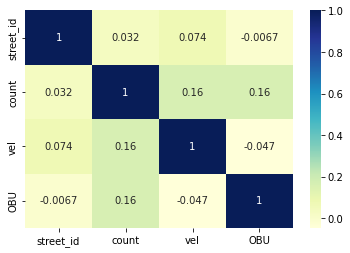

In [36]:
import seaborn as sb
import matplotlib.pyplot as plt


print(df_bxl.corr())
dataplot = sb.heatmap(df_bxl.corr(), cmap="YlGnBu", annot=True)
plt.show()

****Univariate time series analysis

Simple Exponential Smoothing (SES)

In [37]:
bxl_data = df_bxl.drop(['street_id', 'vel', 'OBU'], axis = 1)
bxl5_data = bxl_5.drop(['street_id', 'vel', 'OBU'], axis = 1)

In [38]:
split_date = '5/10/2021'
bxl_train = bxl_data.loc[bxl_data.index <= split_date]
bxl_test = bxl_data.loc[bxl_data.index > split_date]
bxl5_train = bxl5_data.loc[bxl5_data.index <= split_date]
bxl5_test = bxl5_data.loc[bxl5_data.index > split_date]

print(f"{len(bxl_train)} days of training data \n {len(bxl_test)} days of testing data ")
print(f"{len(bxl5_train)} days of training data \n {len(bxl5_test)} days of testing data ")

3298278 days of training data 
 2005076 days of testing data 
1326810 days of training data 
 829696 days of testing data 


In [39]:
arima = ARIMA(bxl5_train, order=(1,1,1))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
